In [331]:
import numpy as np
from astropy.table import Table
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import norm
from lrgs import lrgs

In [332]:
planck_scaling_factor = Table.read('planck_scaling_factor.dat', format='ascii')
bolocam_scaling_factor = Table.read('bolocam_scaling_factor.dat', format='ascii')
planck_scaling_factor_jk = Table.read('planck_scaling_factor_jk_updated.dat', format='ascii')
bolocam_scaling_factor_jk = Table.read('bolocam_scaling_factor_jk_updated.dat', format='ascii')
a478_noise = Table.read('A0478_adjust_noise.dat', format='ascii')

planck_names = ['A2029','A0478','PKS0745','R1542']
bolocam_names = ['A2204','M2129','A1835','M2140','M1931','M1115','M1532','M1720','M0429','M1347','M1423']

In [333]:
for i in range(0, 3):
    planck_scaling_factor[planck_names[i]] = np.log(planck_scaling_factor[planck_names[i]])
    planck_scaling_factor_jk[planck_names[i]] = np.log(planck_scaling_factor_jk[planck_names[i]])
    
for i in range(0, len(bolocam_scaling_factor.columns)):
    bolocam_scaling_factor[bolocam_names[i]] = np.log(bolocam_scaling_factor[bolocam_names[i]])
    bolocam_scaling_factor_jk[bolocam_names[i]] = np.log(bolocam_scaling_factor_jk[bolocam_names[i]])

In [334]:
planck_scaling_factor_jk['A0478'] = planck_scaling_factor_jk['A0478'] + a478_noise['A0478']

In [335]:
planck_new_jks = []
bolocam_new_jks = []

for i in range(0, 3):
    planck_new_jks.append(2*planck_scaling_factor.columns[i] - planck_scaling_factor_jk.columns[i])
    
for i in range(0, 11):
    bolocam_new_jks.append(2*bolocam_scaling_factor.columns[i] - bolocam_scaling_factor_jk.columns[i])

In [336]:
err = []
for i in range(0, 3):
    err.append(np.std(planck_new_jks[i]))
    
for i in range(0, 11):
    err.append(np.std(bolocam_new_jks[i]))

In [337]:
sig = []
y = []

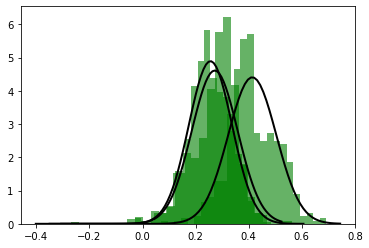

In [338]:
for i in range(0, 3):
    mu, std = norm.fit(planck_new_jks[i])
    sig.append(std**2)
    y.append(mu)
    #print(planck_names[i] + ': mu = ' + str(mu) + ", std = " + str(std))
    plt.hist(planck_new_jks[i], bins=25, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    #plt.show()

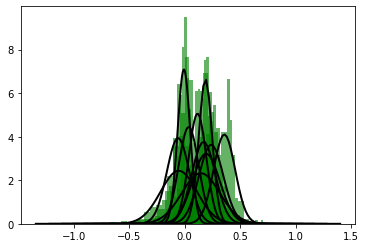

In [339]:
for i in range(0, 11):
    mu, std = norm.fit(bolocam_new_jks[i])
    sig.append(std**2)
    y.append(mu)
    #print(bolocam_names[i] + ': mu = ' + str(mu) + ", std = " + str(std))
    plt.hist(bolocam_new_jks[i], bins=25, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    #plt.show()

In [340]:
M = [np.asmatrix(sig[i]) for i in range(0,14)]
ydata = []
for i in range(0,14):
    ydata.append([y[i]])

In [341]:
ydata = np.asmatrix(ydata)

In [342]:
par = lrgs.Parameters(xdata=None, ydata=ydata, M=M)

In [343]:
chain = lrgs.Chain(par, 10000, 'bs')

In [344]:
chain.run()

In [345]:
dchain = chain.to_dict(["B", "Sigma"])

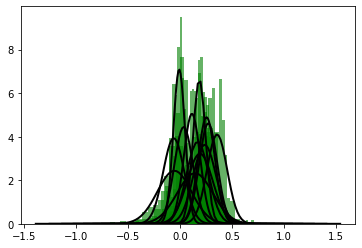

In [346]:
planck_scaling_factor = Table.read('planck_scaling_factor.dat', format='ascii')
bolocam_scaling_factor = Table.read('bolocam_scaling_factor.dat', format='ascii')
planck_scaling_factor_jk = Table.read('planck_scaling_factor_jk_updated.dat', format='ascii')
bolocam_scaling_factor_jk = Table.read('bolocam_scaling_factor_jk_updated.dat', format='ascii')
a478_noise = Table.read('A0478_adjust_noise.dat', format='ascii')

planck_names = ['A2029','A0478','PKS0745','R1542']
bolocam_names = ['A2204','M2129','A1835','M2140','M1931','M1115','M1532','M1720','M0429','M1347','M1423']

for i in range(0, 2):
    planck_scaling_factor[planck_names[i]] = np.log(planck_scaling_factor[planck_names[i]])
    planck_scaling_factor_jk[planck_names[i]] = np.log(planck_scaling_factor_jk[planck_names[i]])
    
for i in range(0, len(bolocam_scaling_factor.columns)):
    bolocam_scaling_factor[bolocam_names[i]] = np.log(bolocam_scaling_factor[bolocam_names[i]])
    bolocam_scaling_factor_jk[bolocam_names[i]] = np.log(bolocam_scaling_factor_jk[bolocam_names[i]])
    
planck_scaling_factor_jk['A0478'] = planck_scaling_factor_jk['A0478'] + a478_noise['A0478']

planck_new_jks = []
bolocam_new_jks = []

for i in range(0, 2):
    planck_new_jks.append(2*planck_scaling_factor.columns[i] - planck_scaling_factor_jk.columns[i])
    
for i in range(0, 11):
    bolocam_new_jks.append(2*bolocam_scaling_factor.columns[i] - bolocam_scaling_factor_jk.columns[i])
    
sig = []
y = []

for i in range(0, 2):
    mu, std = norm.fit(planck_new_jks[i])
    sig.append(std**2)
    y.append(mu)
    #print(planck_names[i] + ': mu = ' + str(mu) + ", std = " + str(std))
    plt.hist(planck_new_jks[i], bins=25, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    #plt.show()
    
for i in range(0, 11):
    mu, std = norm.fit(bolocam_new_jks[i])
    sig.append(std**2)
    y.append(mu)
    #print(bolocam_names[i] + ': mu = ' + str(mu) + ", std = " + str(std))
    plt.hist(bolocam_new_jks[i], bins=25, density=True, alpha=0.6, color='g')
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    #plt.show()
    
M2 = [np.asmatrix(sig[i]) for i in range(0,13)]
ydata2 = []
for i in range(0,13):
    ydata2.append([y[i]])

ydata2 = np.asmatrix(ydata2)
par = lrgs.Parameters(xdata=None, ydata=ydata2, M=M2)
chain = lrgs.Chain(par, 10000, 'bs')
chain.run()
dchain2 = chain.to_dict(["B", "Sigma"])

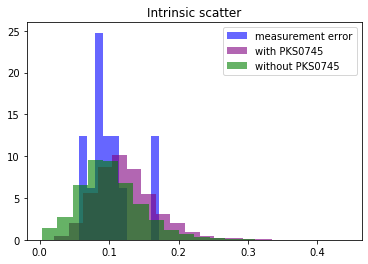

In [347]:
plt.hist(err, color='blue', alpha=0.6, label='measurement error', density=True)
plt.hist(dchain['Sigma_0_0']**0.5, bins=20, alpha=0.6, color='purple', label='with PKS0745', density=True)
plt.hist(dchain2['Sigma_0_0']**0.5, bins=20, alpha=0.6, color='green', label='without PKS0745', density=True)
plt.title('Intrinsic scatter')
plt.legend()
plt.show()